In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
conn = sqlite3.connect('/Users/aaronlevi/Documents/sql_db/pick-a-tune.db')
cur = conn.cursor()

In [3]:
allFeatures = pd.read_sql_query("SELECT * FROM features", conn)
labels = pd.read_sql_query("SELECT label FROM basic_info", conn)
isAdv  = pd.read_sql_query("SELECT model_isAdv FROM label", conn)

allFeatures.drop('index', axis=1, inplace=True)

allFeatures.head()

,tempo,duration_m,time_signature,energy,n_unique_chords,n_difficult_chords,chord_per_min
0,89.132,2.408833,4.0,0.7260,8,2,47.740953
1,76.364,1.981967,4.0,0.0439,21,11,56.509528
2,172.286,3.533967,4.0,0.2920,4,0,17.826993
3,96.996,1.981967,4.0,0.7710,13,13,43.895794
4,129.012,4.212883,4.0,0.4900,3,0,13.292559


In [4]:
intLabel = pd.factorize(labels['Label'], )[0]
print(intLabel[0:4])

dummyLabel=pd.get_dummies(labels)
print(dummyLabel.head())

print(isAdv.head())

[0 0 1 0]
   Label_advanced  Label_intermediate  Label_novice
0               1                   0             0
1               1                   0             0
2               0                   0             1
3               1                   0             0
4               0                   0             1
   model_isAdv
0          0.0
1          1.0
2          0.0
3          1.0
4          0.0


In [5]:
# fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# ax[0].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['novice']==0], featuresWithLabels['n_difficult_chords'][featuresWithLabels['novice']==0])
# ax[0].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['novice']==1], featuresWithLabels['n_difficult_chords'][featuresWithLabels['novice']==1])
# ax[0].set_title('Novice')
# ax[0].set_xlabel('n unique chords')
# ax[0].set_ylabel('n difficult chords')

# ax[1].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['intermediate']==0], featuresWithLabels['n_difficult_chords'][featuresWithLabels['intermediate']==0])
# ax[1].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['intermediate']==1], featuresWithLabels['n_difficult_chords'][featuresWithLabels['intermediate']==1])
# ax[1].set_title('Intermediate')

# ax[2].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['advanced']==0], featuresWithLabels['n_difficult_chords'][featuresWithLabels['advanced']==0])
# ax[2].scatter(featuresWithLabels['n_unique_chords'][featuresWithLabels['advanced']==1], featuresWithLabels['n_difficult_chords'][featuresWithLabels['advanced']==1])
# ax[2].set_title('Advanced')

# fig.savefig("nChords_scatters.png", bbox_inches='tight', dpi=600)

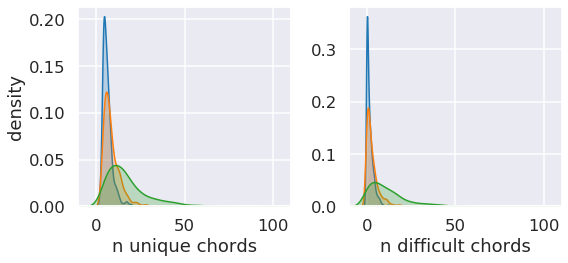

In [16]:
f = plt.figure(figsize=(12, 4))
gs = f.add_gridspec(1, 3)

sns.set_context("talk")

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_novice']==1], fill=True, legend=True)
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_intermediate']==1], fill=True, legend=True)
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==1], fill=True, legend=True)
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_novice']==1], fill=True, legend=False)
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_intermediate']==1], fill=True, legend=False)
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==1], fill=True, legend=False)
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel('')
    ax.set_xlim(-10,110)
    
# with sns.axes_style("darkgrid"):
#     ax = f.add_subplot(gs[0, 2])
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_novice']==1], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_intermediate']==1], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_advanced']==1], legend=False)    

f.tight_layout()

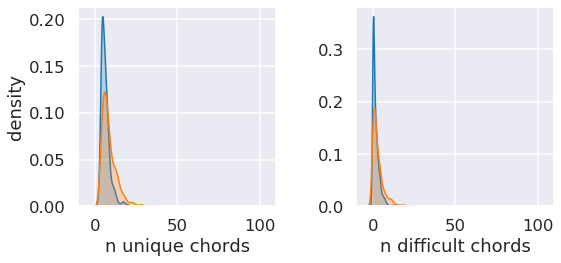

In [13]:
f = plt.figure(figsize=(12, 4))
gs = f.add_gridspec(1, 3)

sns.set_context("talk")

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_novice']==1], fill=True, legend=True)
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_intermediate']==1], fill=True, legend=True)
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    
with sns.axes_style("darkgrid"):    
    ax = f.add_subplot(gs[0, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_novice']==1], fill=True, legend=True)
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_intermediate']==1], fill=True, legend=True)
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel(' ')    
    ax.set_xlim(-10,110)
    
# with sns.axes_style("darkgrid"):
#     ax = f.add_subplot(gs[0, 2])
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_novice']==1], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_intermediate']==1], legend=False)

f.tight_layout()

f.savefig("nov&int.png", bbox_inches='tight', dpi=600)

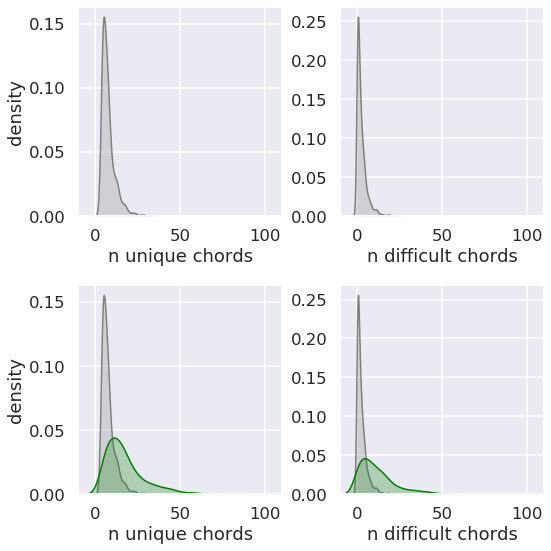

In [10]:
f = plt.figure(figsize=(8, 8))
# gs = f.add_gridspec(1, 3)
gs = f.add_gridspec(2, 2)

sns.set_context("talk")

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==0], fill=True, legend=False, color='gray')
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    ax.set_ylim(0)

    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==0], fill=True, legend=False, color='gray')
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel('')    
    ax.set_xlim(-10,110)
    ax.set_ylim(0)


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==0], fill=True, legend=False, color='gray')
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==1], fill=True, legend=False, color='green')
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==0], fill=True, legend=False, color='gray')
    sns.kdeplot(allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==1], fill=True, legend=False, color='green')
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel('')    
    ax.set_xlim(-10,110)
    
# with sns.axes_style("darkgrid"):
#     ax = f.add_subplot(gs[0, 2])
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_advanced']==0], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_advanced']==1], legend=False)

f.tight_layout()
f.savefig("adv&not.png", bbox_inches='tight', dpi=600)

In [11]:
isAdv['model_isAdv'].head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: model_isAdv, dtype: float64

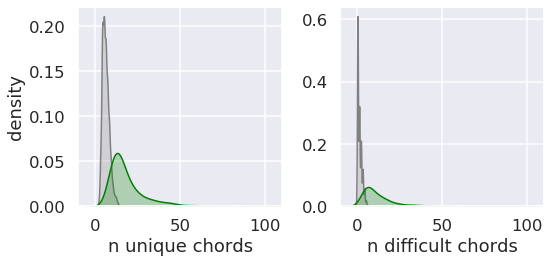

In [14]:
f = plt.figure(figsize=(8, 4))
# gs = f.add_gridspec(1, 3)
gs = f.add_gridspec(1, 2)

sns.set_context("talk")


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.kdeplot(allFeatures['n_unique_chords'][isAdv['model_isAdv']==0], fill=True, legend=False, color='gray')
    sns.kdeplot(allFeatures['n_unique_chords'][isAdv['model_isAdv']==1], fill=True, legend=False, color='green')
    ax.set_xlabel('n unique chords')
    ax.set_ylabel('density')
    ax.set_xlim(-10,110)
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.kdeplot(allFeatures['n_difficult_chords'][isAdv['model_isAdv']==0], fill=True, legend=False, color='gray')
    sns.kdeplot(allFeatures['n_difficult_chords'][isAdv['model_isAdv']==1], fill=True, legend=False, color='green')
    ax.set_xlabel('n difficult chords')
    ax.set_ylabel('')    
    ax.set_xlim(-10,110)
    
# with sns.axes_style("darkgrid"):
#     ax = f.add_subplot(gs[0, 2])
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_advanced']==0], legend=False)
#     sns.kdeplot(allFeatures['chord_per_min'][dummyLabel['Label_advanced']==1], legend=False)

f.tight_layout()
f.savefig("adv&not.png", bbox_inches='tight', dpi=600)

//anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
//anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


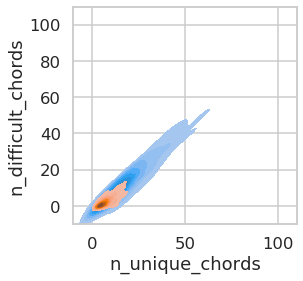

In [27]:
f = plt.figure(figsize=(4, 4))
with sns.axes_style("whitegrid"):
    ax = f.add_subplot()
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==1], 
                allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==1], 
                fill=True)
    
    sns.kdeplot(allFeatures['n_unique_chords'][dummyLabel['Label_advanced']==0], 
            allFeatures['n_difficult_chords'][dummyLabel['Label_advanced']==0], 
            fill=True)
    ax.set_xlim(-10,110)
    ax.set_ylim(-10,110)


In [26]:
allFeatures['label']=labels['Label']
allFeatures['isAdv']=dummyLabel['Label_advanced']
allFeatures.head()

,tempo,duration_m,time_signature,energy,n_unique_chords,n_difficult_chords,chord_per_min,label,isAdv
0,89.132,2.408833,4.0,0.7260,8,2,47.740953,advanced,1
1,76.364,1.981967,4.0,0.0439,21,11,56.509528,advanced,1
2,172.286,3.533967,4.0,0.2920,4,0,17.826993,novice,0
3,96.996,1.981967,4.0,0.7710,13,13,43.895794,advanced,1
4,129.012,4.212883,4.0,0.4900,3,0,13.292559,novice,0


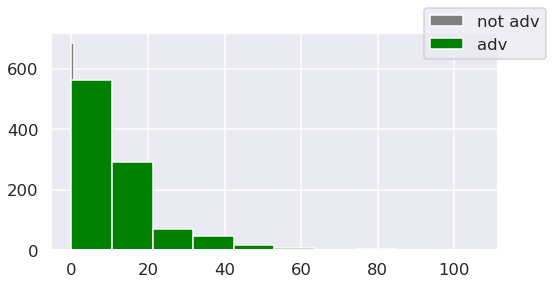

In [39]:
# with sns.axes_style("darkgrid"):
#     f = plt.figure(figsize=(8, 4))
#     h1 = plt.hist(allFeatures['n_difficult_chords'][isAdv['model_isAdv']==0], fill=True, color='gray', label='not adv')
#     h1 = plt.hist(allFeatures['n_difficult_chords'][isAdv['model_isAdv']==1], fill=True, color='green', label='adv')    
#     f.legend()

In [ ]:
tp1=np.nonzero(isAdv['model_isAdv'])
tp2=np.nonzero(dummyLabel['Label_advanced'])

c = np.logical_and(tp1, tp2)

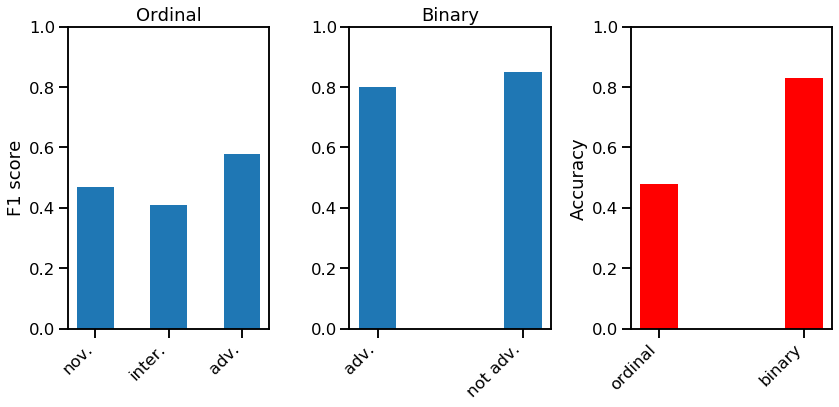

In [117]:
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(1, 3)

ord_class = [.47, .41, .58]
bars = ('nov.', 'inter.', 'adv.')
width = 0.5  # the width of the bars

# fig, ax = plt.subplots()
ax = f.add_subplot(gs[0, 0])
ax.bar(bars, ord_class, width)
plt.xticks(y_pos, bars, rotation=45, horizontalalignment='right')
ax.set_ylim(0,1)
ax.set_ylabel('F1 score')
ax.set_title('Ordinal')

bin_class = [.80, .85]
bars = ('adv.', 'not adv.')
ax = f.add_subplot(gs[0, 1])
width = 0.26  # the width of the bars
ax.bar(bars, bin_class, width)
# ax.xticks(rotation=45)
plt.xticks(bars, rotation=45, horizontalalignment='right')
ax.set_ylim(0,1)
ax.set_title('Binary')

ax=f.add_subplot(gs[0,2])
acc_val = [.48, .83]
bars = ('ordinal', 'binary')
width = 0.26  # the width of the bars
ax.bar(bars, acc_val, width, color='red')
# ax.xticks(rotation=45)
plt.xticks(bars, rotation=45, horizontalalignment='right')
ax.set_ylim(0,1)
ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy')

f.tight_layout()

f.savefig("figures/bar_modelPerformance.png", bbox_inches='tight', dpi=600)